<a href="https://colab.research.google.com/github/aasthagadwal/Rossamnn-sales-analysis/blob/main/Rossman_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Rossman Sales Analysis



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

In this project, we analyzed the Rossmann Store Sales dataset with the aim of understanding sales dynamics and building a predictive model. The project involved the following key steps:

Data Cleaning & Preprocessing: Handled missing values, transformed date variables, and engineered features such as day-of-week, month, year, promo status, and competition metrics.

Exploratory Data Analysis (EDA): Visualized sales trends over time, impact of promotions, holidays, and competition distance on sales, and compared performance across different stores and days.

Feature Engineering: Incorporated temporal features, encoded categorical variables, and scaled continuous ones for optimal model performance.

Model Building: Built and evaluated multiple regression models including Linear Regression, Random Forest, and XGBoost Regressor to predict store-level daily sales.

Model Evaluation: Used metrics such as RMSE and R² score to assess model accuracy

# **GitHub Link -**

https://github.com/aasthagadwal

# **Problem Statement**


Rossmann operates over 3,000 drug stores across several European countries. To support sales planning and effective decision-making, Rossmann seeks a robust and data-driven approach to forecast daily sales at each store. The goal of this project is to perform exploratory data analysis (EDA) to uncover sales patterns and influencing factors, and then build a regression model that can accurately predict sales for each store based on historical data and relevant features like promotions, holidays, and store-specific attributes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
store_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Rossmann ML Project/store.csv')

In [ ]:
ross_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Rossmann ML Project/Rossmann Stores Data - Rossmann Stores Data.csv')

/tmp/ipython-input-4-2157298527.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Rossmann ML Project/Rossmann Stores Data - Rossmann Stores Data.csv')


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
merged_df=ross_df.merge(store_df, how='left', on='Store')

### Dataset First View

In [ ]:
# Dataset First Look
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
merged_df.shape

(1017209, 18)

### Dataset Information

In [ ]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
merged_df.duplicated().sum()

np.int64(0)

No duplicate values are present

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#fill null values
missing_values=merged_df.isnull().sum()

In [ ]:
missing_percentage = (missing_values / len(merged_df)) * 100

In [ ]:
missing_df = pd.DataFrame({'Column': merged_df.columns, 'Missing Values': missing_values, 'Missing %': missing_percentage})

In [ ]:
missing_df

,Column,Missing Values,Missing %
Store,Store,0,0.000000
DayOfWeek,DayOfWeek,0,0.000000
Date,Date,0,0.000000
Sales,Sales,0,0.000000
Customers,Customers,0,0.000000
Open,Open,0,0.000000
Promo,Promo,0,0.000000
StateHoliday,StateHoliday,0,0.000000
SchoolHoliday,SchoolHoliday,0,0.000000
StoreType,StoreType,0,0.000000


In [ ]:
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing %', ascending=False)

,Column,Missing Values,Missing %
Promo2SinceYear,Promo2SinceYear,508031,49.943620
Promo2SinceWeek,Promo2SinceWeek,508031,49.943620
PromoInterval,PromoInterval,508031,49.943620
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,323348,31.787764
CompetitionOpenSinceYear,CompetitionOpenSinceYear,323348,31.787764
CompetitionDistance,CompetitionDistance,2642,0.259730


In [ ]:
# Filling missing values
merged_df['CompetitionDistance'].fillna(merged_df['CompetitionDistance'].median(), inplace=True)
merged_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
merged_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
merged_df['Promo2SinceWeek'].fillna(0, inplace=True)
merged_df['Promo2SinceYear'].fillna(0, inplace=True)
merged_df['PromoInterval'].fillna("No Promo", inplace=True)

/tmp/ipython-input-20-508292260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['CompetitionDistance'].fillna(merged_df['CompetitionDistance'].median(), inplace=True)
/tmp/ipython-input-20-508292260.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [ ]:
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
#changing data type
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
#feature engineering
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day

In [ ]:
merged_df['WeekOfYear'] = merged_df['Date'].dt.isocalendar().week

In [ ]:
merged_df['IsWeekend']=merged_df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

In [ ]:
merged_df.shape

(1017209, 23)

### What all manipulations have you done and insights you found?

1. Null values are filled with mean,median imputation
2. Feature engineering is done to make new columns

# 4.Data Visualization

### 1.Sales distribution

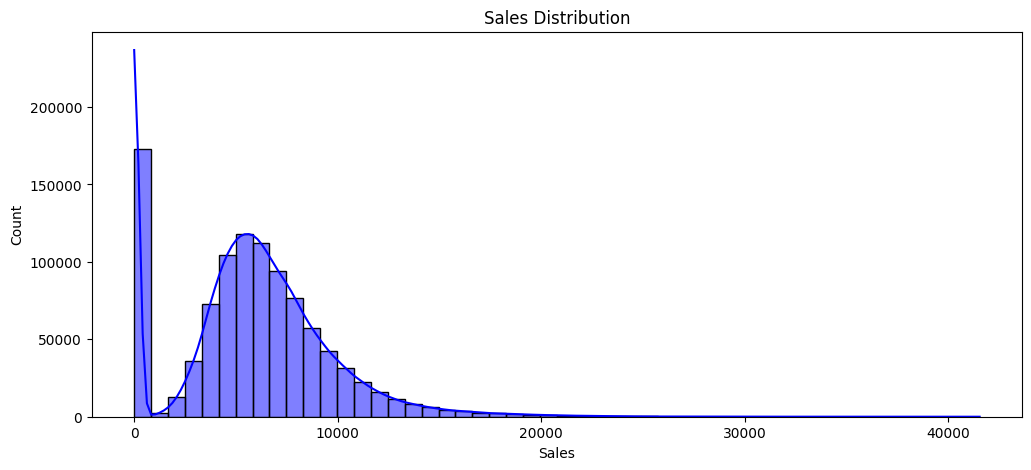

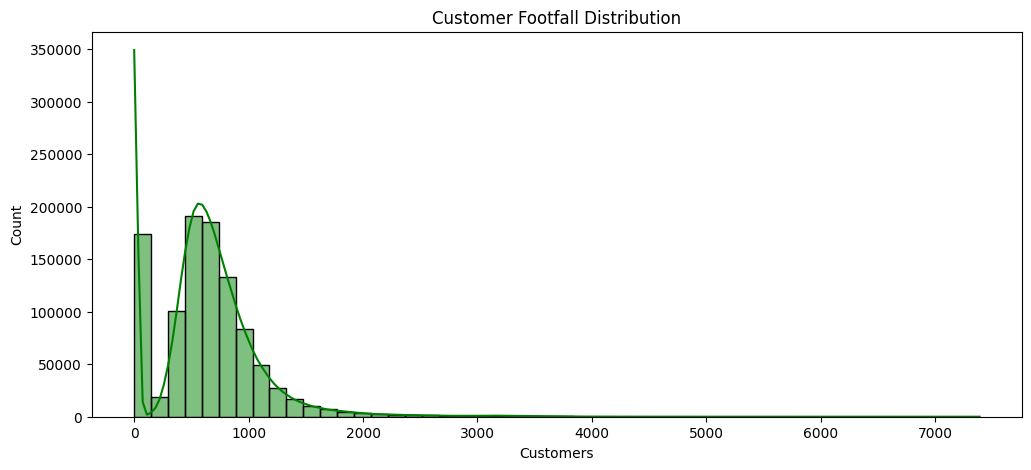

In [ ]:
# Sales Distribution
plt.figure(figsize=(12, 5))
sns.histplot(merged_df['Sales'], bins=50, kde=True, color='blue')
plt.title("Sales Distribution")
plt.show()
plt.figure(figsize=(12, 5))
sns.histplot(merged_df['Customers'], bins=50, kde=True, color='green')
plt.title("Customer Footfall Distribution")
plt.show()

In [ ]:
merged_df = merged_df[merged_df['Open'] != 0]
#This will remove unnecessary noise from the dataset.

In [ ]:
#Since Sales & Customers are right-skewed, log transformation helps normalize them.
merged_df['Sales_log'] =np.log1p(merged_df['Sales'])
merged_df['Customers_log']=np.log1p(merged_df['Customers'])

/tmp/ipython-input-31-3320002476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Sales_log'] =np.log1p(merged_df['Sales'])
/tmp/ipython-input-31-3320002476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Customers_log']=np.log1p(merged_df['Customers'])


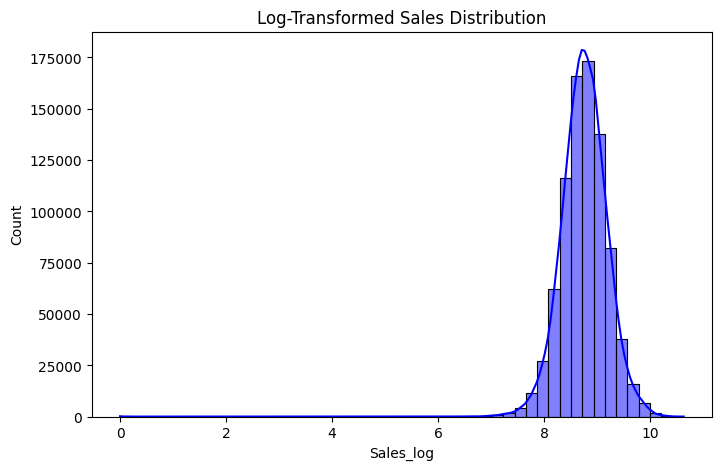

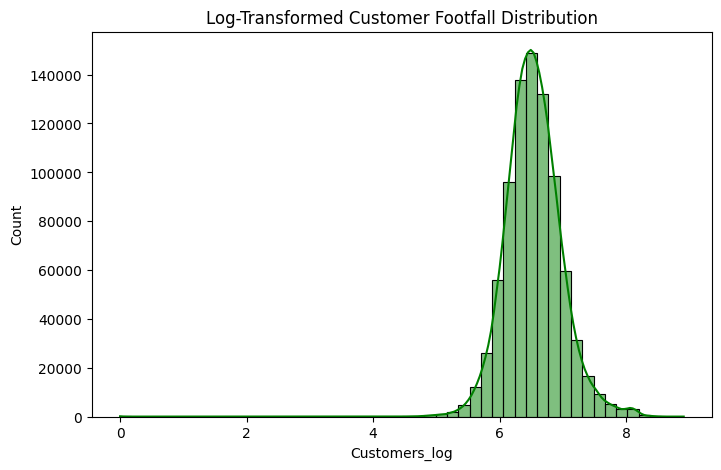

In [ ]:
#Plot Log-Transformed Distributions
# Plot transformed Sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Sales_log'], bins=50, kde=True, color='blue')
plt.title("Log-Transformed Sales Distribution")
plt.show()

# Plot transformed Customers distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Customers_log'], bins=50, kde=True, color='green')
plt.title("Log-Transformed Customer Footfall Distribution")
plt.show()

#5.Pre Processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#let’s handle categorical variables using Label Encoding or One-Hot Encoding.
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
merged_df[categorical_cols].nunique()

,0
StateHoliday,5
StoreType,4
Assortment,3
PromoInterval,4


In [ ]:
merged_df['StateHoliday'] = merged_df['StateHoliday'].astype(str)

/tmp/ipython-input-35-3281117105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['StateHoliday'] = merged_df['StateHoliday'].astype(str)


In [ ]:
#for Binary Categorical Variables (StateHoliday) → Label Encoding
le=LabelEncoder()
merged_df['StateHoliday'] = le.fit_transform(merged_df['StateHoliday'])


/tmp/ipython-input-36-268833774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['StateHoliday'] = le.fit_transform(merged_df['StateHoliday'])


In [ ]:
#For Multi-Class Categorical Variables (StoreType, Assortment, PromoInterval) → One-Hot Encoding
merged_df=pd.get_dummies(merged_df, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
#convert categorical variables into numerical values by creating dummy/one-hot encoded variables.


# Model Building

In [ ]:
# Select numeric columns for scaling
scale_cols = ['CompetitionDistance', 'Customers_log']
scaler = StandardScaler()
X = merged_df.drop(columns=['Sales', 'Date', 'Customers', 'Store', 'Sales_log'])  # Features
y = merged_df['Sales_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (675513, 25), Test Shape: (168879, 25)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)  # Predict on test set
# Evaluate the Model
mse=mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5
print(f"Linear Regression RMSE: {rmse:.4f}")

Linear Regression RMSE: 0.1594


In [ ]:
print("First few actual values:", y_test[:5].values)
print("First few predicted values:", y_pred[:5])


First few actual values: [8.55718284 9.05847042 8.77431296 8.88889467 8.37562963]
First few predicted values: [8.48053731 8.93871095 8.5678956  8.67453296 8.32604696]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
rmse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Decision Tree RMSE: {rmse_dt:.4f}")

Decision Tree RMSE: 0.0203


In [ ]:
y_train_pred = dt_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {rmse_dt:.4f}")  # Already calculated Decision Tree RMSE

Train RMSE: 0.0198
Test RMSE: 0.0203


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.4f}")


Random Forest RMSE: 0.0183


#### Reverse the log transformation after prediction to original values.

In [ ]:
y_pred_original=np.expm1(y_pred_rf)
y_test_original=np.expm1(y_test)
print(y_test_original[:5].values)
print(y_pred_original[:5])

[5203. 8590. 6465. 7250. 4339.]
[4127.49529317 7580.21754049 5701.0225801  5864.2744546  3676.44922239]


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
rmse=mean_squared_error(y_test_original,y_pred_original)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 732.0811
R² Score: 0.8928


# **Conclusion**

This project successfully demonstrated the use of regression models to forecast daily sales for Rossmann stores using historical and contextual features. After conducting exploratory data analysis and engineering relevant features (such as promotions, holidays, and store-specific information), three models were developed and evaluated:

Linear Regression served as a baseline model but struggled to capture non-linear relationships and complex feature interactions, resulting in comparatively lower accuracy.

Decision Tree Regressor improved performance by handling non-linear patterns, but was prone to overfitting and lacked generalization on unseen data.

Random Forest Regressor emerged as the best-performing model, leveraging ensemble learning to reduce variance and improve predictive accuracy. It effectively captured complex patterns in the data, especially interactions between promotional events, holidays, and sales trends.

By comparing metrics like R² score and RMSE, Random Forest provided the most reliable predictions, making it suitable for real-world business decision-making. These predictions can help Rossmann optimize store operations, staffing, inventory planning, and promotional strategies, ultimately leading to better customer service and higher profitability.